In [3]:
from typing import TypedDict, Annotated,List
from langchain_core.messages import HumanMessage
from langgraph.graph import add_messages, StateGraph, END
from langchain_groq import ChatGroq
from dotenv import load_dotenv

In [4]:
llmLlama=ChatGroq(model="llama-3.1-8b-instant")

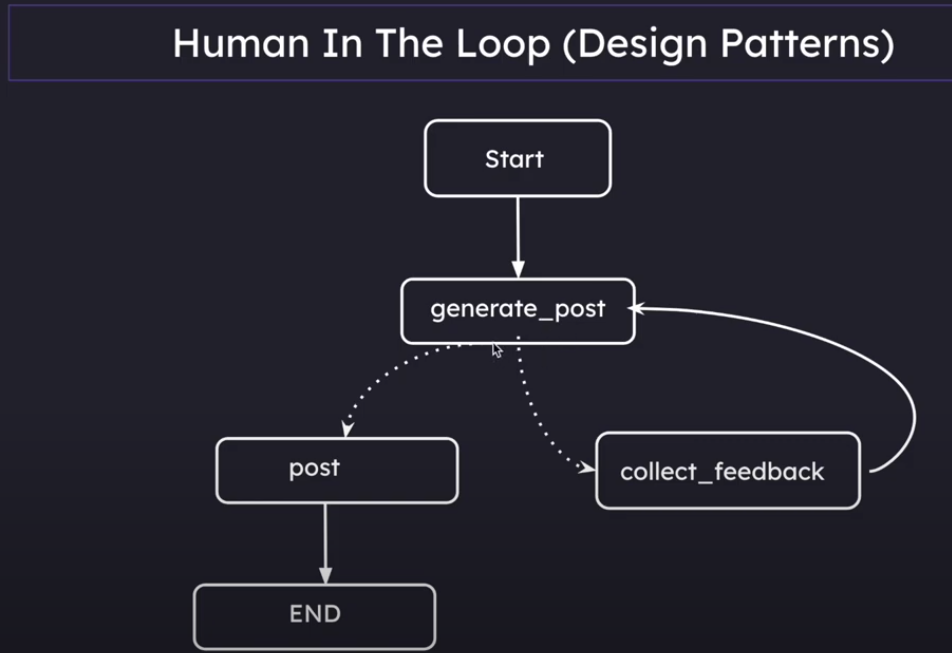

In [25]:
class State(TypedDict):
    messages: Annotated[List, add_messages]

In [26]:
GENERATE_POST="generate_post"
GET_REVIEW_DECISION="get_review_decision"
POST="post"
COLLECT_FEEDBACK="collect_feedback"

In [27]:
def generate_post(state: State):
    return {"messages":[llmLlama.invoke(input=state["messages"])]}

In [28]:
def get_review_decision(state:State):
    post_content=state["messages"][-1].content
    print(f"\nCurrent LinkedIn Post \n: {post_content}\n")

    decision=input("Post to LinkedIn: Yes/No?").lower()
    if decision=="yes":
        return POST
    else:
        return COLLECT_FEEDBACK
    

In [29]:
def collect_feedback(state:State):
    feedback=input("How can I improve this post?")
    return {
        "messages":[HumanMessage(content=feedback)]
    }

In [55]:
def post(state:State):
    response=state["messages"][-1].content
    print("Post is now live on Linkedin")
    print(response)

In [56]:
graph=StateGraph(state_schema=State)

In [57]:
graph.add_node(node=GENERATE_POST,action=generate_post)

In [58]:
graph.add_node(node=GET_REVIEW_DECISION,action=get_review_decision)

In [59]:
graph.add_node(node=COLLECT_FEEDBACK,action=collect_feedback)

In [60]:
graph.add_node(node=POST,action=post)

In [61]:
graph.add_conditional_edges(source=GENERATE_POST,path=get_review_decision)

In [62]:
graph.add_edge(start_key=COLLECT_FEEDBACK,end_key=GENERATE_POST)

In [63]:
graph.add_edge(start_key=POST,end_key=END)

In [64]:
graph.set_entry_point(key=GENERATE_POST)

In [65]:
app=graph.compile()

In [67]:
response=app.invoke(input={
    "messages":[HumanMessage(content="Write a LinkedIn Post on Agents taking over content creation")]
})


Current LinkedIn Post 
: **The Rise of the Agent-Content Creator: A Game-Changer in the Industry?**

As the real estate landscape continues to evolve, we're witnessing a significant shift in the way agents approach content creation. Gone are the days of relying solely on external vendors or generic templates. Today, agents are taking the reins and becoming their own content creators.

**Why is this happening?**

1. **Personalization**: Agents are recognizing the value of authentic, high-quality content that truly reflects their brand and personality.
2. **Cost-effectiveness**: Creating content in-house eliminates the need for expensive agency fees or subscription-based services.
3. **Flexibility**: With the ability to produce content at will, agents can respond quickly to market changes and stay ahead of the competition.
4. **Increased engagement**: By sharing their own stories, experiences, and expertise, agents are building deeper connections with their audience and establishing the

Post to LinkedIn: Yes/No? no
How can I improve this post? Make the post 4 lines



Current LinkedIn Post 
: **The Rise of Agent-Content Creators**

Real estate agents are taking charge of their own content creation, allowing for authentic, high-quality storytelling that truly reflects their brand. By investing in their skills and unique voice, agents can build deeper connections with their audience and establish themselves as trusted authorities. This DIY approach is not only cost-effective but also increases flexibility and engagement. Join the conversation and let's explore the possibilities of agent-led content creation together! #AgentLedContent #RealEstateMarketing #ContentCreation



Post to LinkedIn: Yes/No? Yes


Post is now live on Linkedin
**The Rise of Agent-Content Creators**

Real estate agents are taking charge of their own content creation, allowing for authentic, high-quality storytelling that truly reflects their brand. By investing in their skills and unique voice, agents can build deeper connections with their audience and establish themselves as trusted authorities. This DIY approach is not only cost-effective but also increases flexibility and engagement. Join the conversation and let's explore the possibilities of agent-led content creation together! #AgentLedContent #RealEstateMarketing #ContentCreation
